In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

numpy version :  1.23.5
pandas version :  1.5.3
seaborn version :  0.12.2


# **Data Preprocessing**

In [ ]:
df = pd.read_csv('flight.csv')
df.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

## Missing Values

In [ ]:
df.isna().sum()

MEMBER_NO               0
FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  3
FFP_TIER                0
WORK_CITY            2269
WORK_PROVINCE        3248
WORK_COUNTRY           26
AGE                   420
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1              551
SUM_YR_2              138
SEG_KM_SUM              0
LAST_FLIGHT_DATE        0
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
dtype: int64

In [ ]:
# percentage version
df.isna().sum() * 100 / len(df)

MEMBER_NO            0.000000
FFP_DATE             0.000000
FIRST_FLIGHT_DATE    0.000000
GENDER               0.004763
FFP_TIER             0.000000
WORK_CITY            3.602273
WORK_PROVINCE        5.156538
WORK_COUNTRY         0.041278
AGE                  0.666794
LOAD_TIME            0.000000
FLIGHT_COUNT         0.000000
BP_SUM               0.000000
SUM_YR_1             0.874770
SUM_YR_2             0.219089
SEG_KM_SUM           0.000000
LAST_FLIGHT_DATE     0.000000
LAST_TO_END          0.000000
AVG_INTERVAL         0.000000
MAX_INTERVAL         0.000000
EXCHANGE_COUNT       0.000000
avg_discount         0.000000
Points_Sum           0.000000
Point_NotFlight      0.000000
dtype: float64

In [ ]:
# portion missing values considering all column
((df.shape[0] - df.dropna().shape[0])/df.shape[0])*100

7.514129675493744

### Since number of rows with missing values are relatively small, we can simply drop them (simple, yet the best option)

## Drop Missing Values

In [ ]:
df = df.dropna()

In [ ]:
df.isna().sum()

MEMBER_NO            0
FFP_DATE             0
FIRST_FLIGHT_DATE    0
GENDER               0
FFP_TIER             0
WORK_CITY            0
WORK_PROVINCE        0
WORK_COUNTRY         0
AGE                  0
LOAD_TIME            0
FLIGHT_COUNT         0
BP_SUM               0
SUM_YR_1             0
SUM_YR_2             0
SEG_KM_SUM           0
LAST_FLIGHT_DATE     0
LAST_TO_END          0
AVG_INTERVAL         0
MAX_INTERVAL         0
EXCHANGE_COUNT       0
avg_discount         0
Points_Sum           0
Point_NotFlight      0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58255 entries, 0 to 62986
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          58255 non-null  int64  
 1   FFP_DATE           58255 non-null  object 
 2   FIRST_FLIGHT_DATE  58255 non-null  object 
 3   GENDER             58255 non-null  object 
 4   FFP_TIER           58255 non-null  int64  
 5   WORK_CITY          58255 non-null  object 
 6   WORK_PROVINCE      58255 non-null  object 
 7   WORK_COUNTRY       58255 non-null  object 
 8   AGE                58255 non-null  float64
 9   LOAD_TIME          58255 non-null  object 
 10  FLIGHT_COUNT       58255 non-null  int64  
 11  BP_SUM             58255 non-null  int64  
 12  SUM_YR_1           58255 non-null  float64
 13  SUM_YR_2           58255 non-null  float64
 14  SEG_KM_SUM         58255 non-null  int64  
 15  LAST_FLIGHT_DATE   58255 non-null  object 
 16  LAST_TO_END        582

### Success removing null values!

## Duplicates Values

In [ ]:
df.duplicated().sum()

0

### Theres no duplicates values!

In [ ]:
nums= ['MEMBER_NO','FFP_TIER','AGE','FLIGHT_COUNT','BP_SUM','SUM_YR_1','SUM_YR_2','SEG_KM_SUM','LAST_TO_END','AVG_INTERVAL','MAX_INTERVAL','EXCHANGE_COUNT','avg_discount','Points_Sum','Point_NotFlight']
df[nums].describe()

,MEMBER_NO,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
count,58255.000000,58255.000000,58255.000000,58255.000000,58255.000000,58255.000000,58255.000000,58255.000000,58255.000000,58255.000000,58255.000000,58255.000000,58255.000000,58255.000000,58255.000000
mean,31545.754854,4.104849,42.228736,12.067634,11066.303682,5366.827963,5694.530650,17353.000910,171.255309,67.937285,167.349206,0.328384,0.720627,12742.648820,2.820548
std,18187.496028,0.378182,9.761965,14.236472,16283.209178,8103.595049,8710.724917,20969.886756,180.560120,77.449058,122.890446,1.148485,0.183895,20606.104272,7.500252
min,3.000000,4.000000,6.000000,2.000000,0.000000,0.000000,0.000000,368.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15787.500000,4.000000,35.000000,3.000000,2608.000000,1016.000000,846.000000,4904.000000,28.000000,23.700000,81.000000,0.000000,0.612155,2872.500000,0.000000
50%,31603.000000,4.000000,41.000000,7.000000,5832.000000,2808.000000,2846.000000,10237.000000,104.000000,44.833333,144.000000,0.000000,0.711468,6487.000000,0.000000
75%,47315.500000,4.000000,48.000000,15.000000,13022.000000,6591.500000,6958.000000,21571.500000,258.000000,82.000000,228.000000,0.000000,0.808159,14527.000000,1.000000
max,62988.000000,6.000000,110.000000,213.000000,505308.000000,239560.000000,234188.000000,580717.000000,731.000000,728.000000,728.000000,46.000000,1.500000,985572.000000,140.000000


In [ ]:
cats= ['FFP_DATE','FIRST_FLIGHT_DATE','GENDER','WORK_CITY','WORK_PROVINCE','WORK_COUNTRY','LOAD_TIME','LAST_FLIGHT_DATE']
df[cats].describe()

,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,LOAD_TIME,LAST_FLIGHT_DATE
count,58255,58255,58255,58255,58255,58255,58255,58255
unique,3062,3399,2,2944,1127,105,1,731
top,1/13/2011,2/16/2013,Male,guangzhou,guangdong,CN,3/31/2014,3/31/2014
freq,179,88,44434,9283,17329,54954,58255,915


## Exploratory Data Analysis

In [ ]:
df.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39
5,56972,2/10/2008,9/29/2009,Male,6,guangzhou,guangdong,CN,64.0,3/31/2014,...,76946.0,294585,1/13/2014,79,7.043956,52,10,0.967692,343121,15


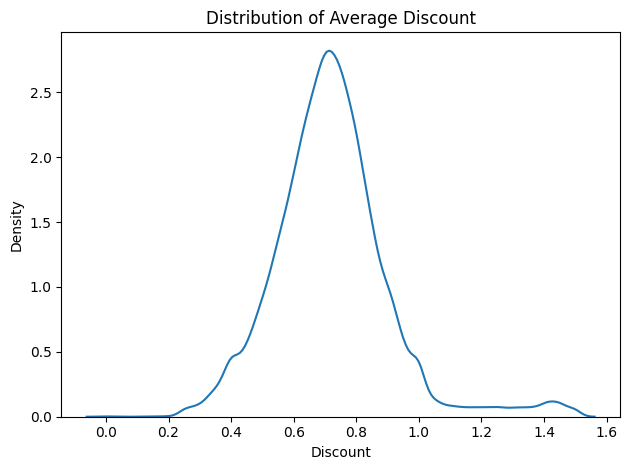

In [ ]:
ax = sns.kdeplot(x = 'avg_discount', data=df)
ax.set_title("Distribution of Average Discount")
ax.set_ylabel("Density")
ax.set_xlabel("Discount")
plt.tight_layout()

### - anggap 1 = 100%
### - terdapat avg discount yang lebih dari 100% sehingga tidak valid, maka data tersebut akan di drop

In [ ]:
df = df[df['avg_discount']<=1]

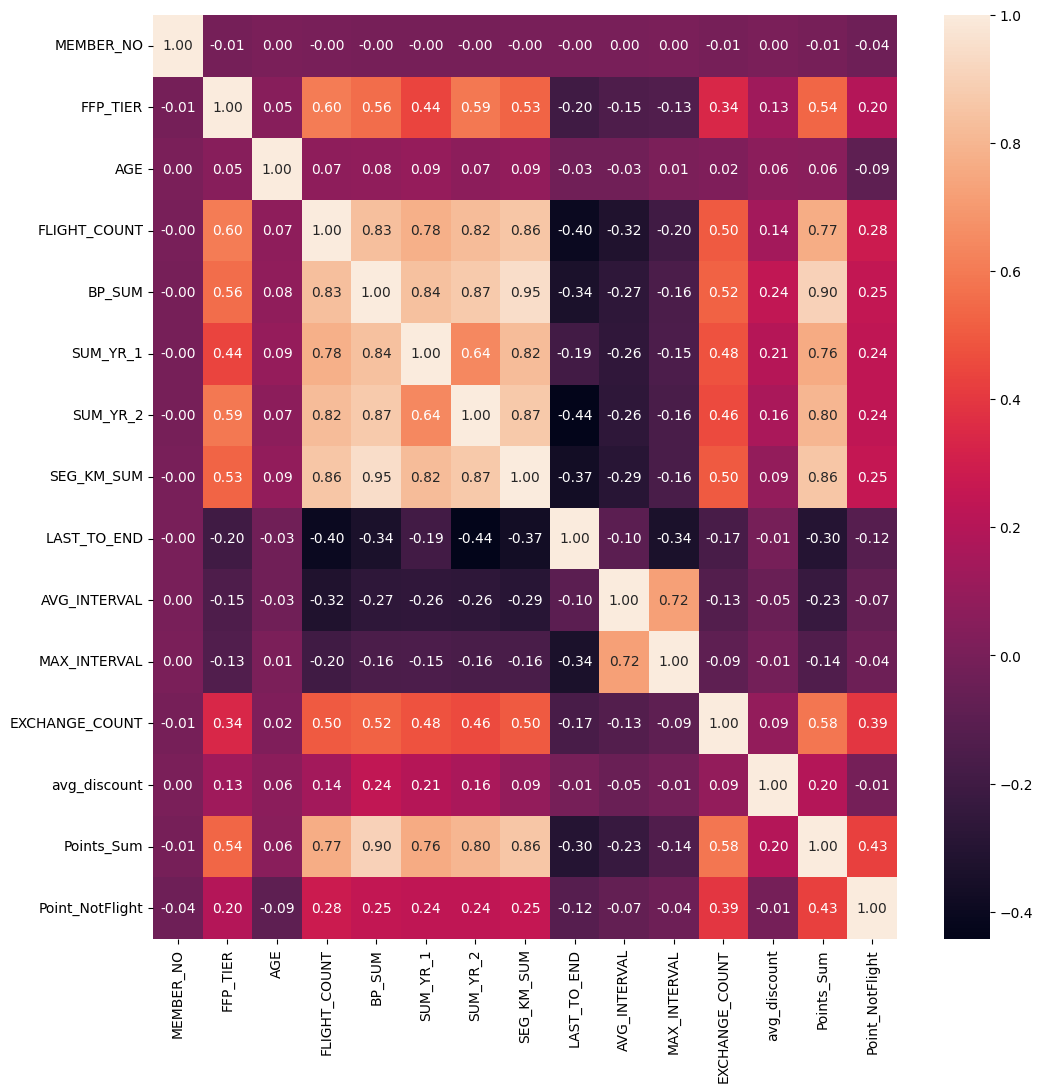

In [ ]:
corr = df.corr()

plt.figure(figsize=(12,12))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()


### Feature Selection :
### Fitur yang nilai korelasinya rendah dan dianggap tidak berhubungan dalam penyelesaian masalah akan didrop dari dataset, diantaranya fitur:
- member_no
- age
- exchange_count
- avg_interval
- max_interval
- point_notflight
- sum_yr_1
- sum_yr_2
- last_to_end
- gender
- work_city
- work_province
- work_country

In [ ]:
dfc = df.copy()

In [ ]:
dfc = dfc.drop(['MEMBER_NO','AGE','EXCHANGE_COUNT',
                'SUM_YR_1','SUM_YR_2','Point_NotFlight',
                'AVG_INTERVAL','MAX_INTERVAL', 'LAST_TO_END',
                'GENDER', 'WORK_CITY', 'WORK_PROVINCE',
                'WORK_COUNTRY'], axis = 1)


In [ ]:
dfc.head()

,FFP_DATE,FIRST_FLIGHT_DATE,FFP_TIER,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SEG_KM_SUM,LAST_FLIGHT_DATE,avg_discount,Points_Sum
0,11/2/2006,12/24/2008,6,3/31/2014,210,505308,580717,3/31/2014,0.961639,619760
4,4/10/2009,4/15/2009,6,3/31/2014,152,273844,309928,3/27/2014,0.970658,338813
5,2/10/2008,9/29/2009,6,3/31/2014,92,313338,294585,1/13/2014,0.967692,343121
6,3/22/2006,3/29/2006,6,3/31/2014,101,248864,287042,3/31/2014,0.965347,298873
7,4/9/2010,4/9/2010,6,3/31/2014,73,301864,287230,3/29/2014,0.962070,351198


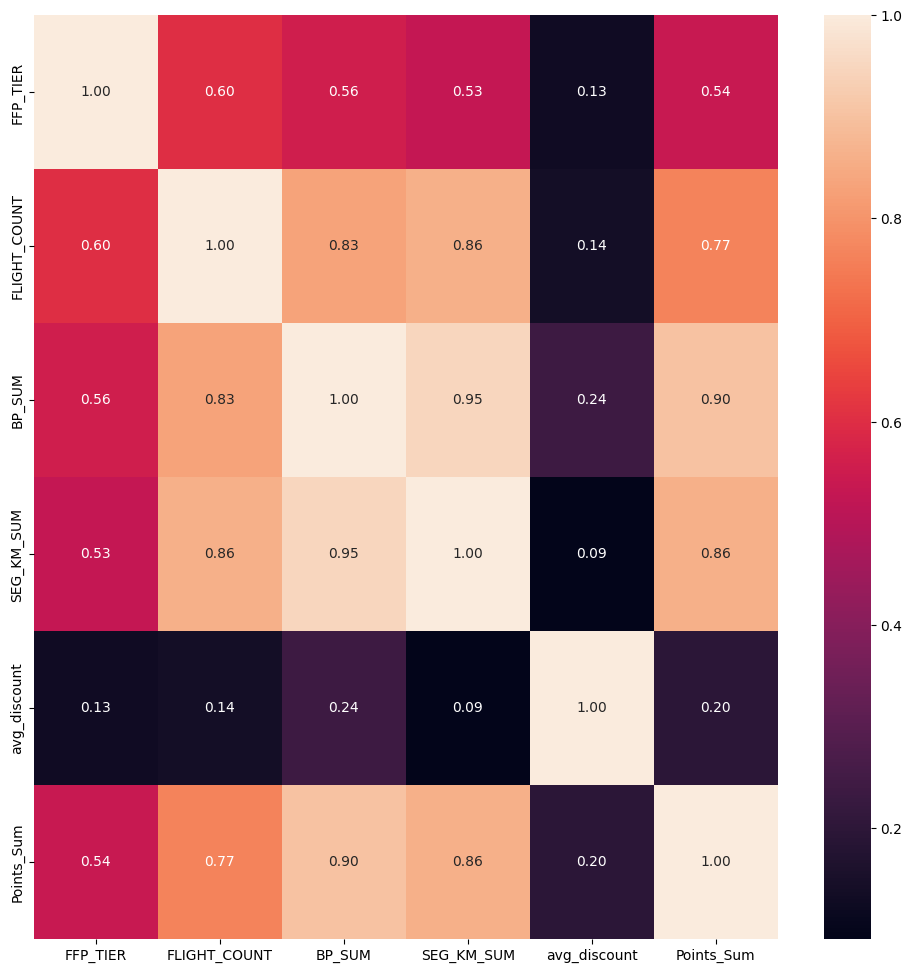

In [ ]:
corr = dfc.corr()

plt.figure(figsize=(12,12))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

### Feature Selection:
### terdapat fitur yang berkorelasi tinggi yaitu fitur:
- bp_sum
- seg_km_sum
- point_sum
### dalam modeling dapat memilih salah satu saja yaitu seg_km_sum. sehingga dua fitur lainnya akan di drop

In [ ]:
dfc = dfc.drop(['BP_SUM','Points_Sum'], axis = 1)

In [ ]:
dfc.head()

,FFP_DATE,FIRST_FLIGHT_DATE,FFP_TIER,LOAD_TIME,FLIGHT_COUNT,SEG_KM_SUM,LAST_FLIGHT_DATE,avg_discount
0,11/2/2006,12/24/2008,6,3/31/2014,210,580717,3/31/2014,0.961639
4,4/10/2009,4/15/2009,6,3/31/2014,152,309928,3/27/2014,0.970658
5,2/10/2008,9/29/2009,6,3/31/2014,92,294585,1/13/2014,0.967692
6,3/22/2006,3/29/2006,6,3/31/2014,101,287042,3/31/2014,0.965347
7,4/9/2010,4/9/2010,6,3/31/2014,73,287230,3/29/2014,0.962070


### Summary:
### - Dari fitur tersebut, untuk mengetahui pelanggan loyal bisa dilihat dari jumlah rata - rata flight per tahun
### - Untuk mengetahui lamanya pelanggan, bisa dilihat dari jarak antara tanggal diambil data (load time) dan tanggal bergabung (ffp_date)

## Feature Engineering

In [ ]:
dfd = dfc.copy()

In [ ]:
dfd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55613 entries, 0 to 62986
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   FFP_DATE           55613 non-null  object 
 1   FIRST_FLIGHT_DATE  55613 non-null  object 
 2   FFP_TIER           55613 non-null  int64  
 3   LOAD_TIME          55613 non-null  object 
 4   FLIGHT_COUNT       55613 non-null  int64  
 5   SEG_KM_SUM         55613 non-null  int64  
 6   LAST_FLIGHT_DATE   55613 non-null  object 
 7   avg_discount       55613 non-null  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 3.8+ MB


In [ ]:
dfd.head(3)

,FFP_DATE,FIRST_FLIGHT_DATE,FFP_TIER,LOAD_TIME,FLIGHT_COUNT,SEG_KM_SUM,LAST_FLIGHT_DATE,avg_discount
0,11/2/2006,12/24/2008,6,3/31/2014,210,580717,3/31/2014,0.961639
4,4/10/2009,4/15/2009,6,3/31/2014,152,309928,3/27/2014,0.970658
5,2/10/2008,9/29/2009,6,3/31/2014,92,294585,1/13/2014,0.967692


In [ ]:
dfd[dfd['LAST_FLIGHT_DATE'] == '2014/2/29  0:00:00']
dfd.head(3)

,FFP_DATE,FIRST_FLIGHT_DATE,FFP_TIER,LOAD_TIME,FLIGHT_COUNT,SEG_KM_SUM,LAST_FLIGHT_DATE,avg_discount
0,11/2/2006,12/24/2008,6,3/31/2014,210,580717,3/31/2014,0.961639
4,4/10/2009,4/15/2009,6,3/31/2014,152,309928,3/27/2014,0.970658
5,2/10/2008,9/29/2009,6,3/31/2014,92,294585,1/13/2014,0.967692


In [ ]:
dfd['LAST_FLIGHT_DATE'] = df['LAST_FLIGHT_DATE'].replace('2014/2/29  0:00:00', '2014/2/28  0:00:00')

In [ ]:
# convert data tanggal menjadi tipe date time
dfd["LOAD_TIME"] = pd.to_datetime(dfd["LOAD_TIME"])
dfd["FFP_DATE"] = pd.to_datetime(dfd["FFP_DATE"])
dfd["FIRST_FLIGHT_DATE"] = pd.to_datetime(dfd["FIRST_FLIGHT_DATE"])
dfd["LAST_FLIGHT_DATE"] = pd.to_datetime(dfd["LAST_FLIGHT_DATE"])
dfd["LOAD_TIME"] = dfd["LOAD_TIME"].values.astype('datetime64[ns]')
dfd["FFP_DATE"] = dfd["FFP_DATE"].values.astype('datetime64[ns]')
dfd["FIRST_FLIGHT_DATE"] = dfd["FIRST_FLIGHT_DATE"].values.astype('datetime64[ns]')
dfd["LAST_FLIGHT_DATE"] = dfd["LAST_FLIGHT_DATE"].values.astype('datetime64[ns]')

In [ ]:
dfd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55613 entries, 0 to 62986
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   FFP_DATE           55613 non-null  datetime64[ns]
 1   FIRST_FLIGHT_DATE  55613 non-null  datetime64[ns]
 2   FFP_TIER           55613 non-null  int64         
 3   LOAD_TIME          55613 non-null  datetime64[ns]
 4   FLIGHT_COUNT       55613 non-null  int64         
 5   SEG_KM_SUM         55613 non-null  int64         
 6   LAST_FLIGHT_DATE   55613 non-null  datetime64[ns]
 7   avg_discount       55613 non-null  float64       
dtypes: datetime64[ns](4), float64(1), int64(3)
memory usage: 3.8 MB


### Membuat fitur Pelanggan Loyal

In [ ]:
# mengetahui pelanggan loyal bisa dilihat dengan rata - rata flight per tahun

dfd['flight_year']=dfd['FLIGHT_COUNT']/((dfd['LAST_FLIGHT_DATE'] - dfd['FIRST_FLIGHT_DATE'])/np.timedelta64(1,'Y'))
dfd.head(3)

,FFP_DATE,FIRST_FLIGHT_DATE,FFP_TIER,LOAD_TIME,FLIGHT_COUNT,SEG_KM_SUM,LAST_FLIGHT_DATE,avg_discount,flight_year
0,2006-11-02,2008-12-24,6,2014-03-31,210,580717,2014-03-31,0.961639,39.886076
4,2009-04-10,2009-04-15,6,2014-03-31,152,309928,2014-03-27,0.970658,30.723221
5,2008-02-10,2009-09-29,6,2014-03-31,92,294585,2014-01-13,0.967692,21.443720


### Membuat fitur Durasi Pelanggan Menjadi Member

In [ ]:
# Untuk mengetahui durasi pelanggan, bisa dilihat dari jarak antara tanggal diambil data (load time) dan tanggal bergabung (ffp_date)

dfd['meeting_time']=(dfd['LOAD_TIME']-dfd['FFP_DATE'])/np.timedelta64(1,'M')
dfd.head(3)

,FFP_DATE,FIRST_FLIGHT_DATE,FFP_TIER,LOAD_TIME,FLIGHT_COUNT,SEG_KM_SUM,LAST_FLIGHT_DATE,avg_discount,flight_year,meeting_time
0,2006-11-02,2008-12-24,6,2014-03-31,210,580717,2014-03-31,0.961639,39.886076,88.905316
4,2009-04-10,2009-04-15,6,2014-03-31,152,309928,2014-03-27,0.970658,30.723221,59.664469
5,2008-02-10,2009-09-29,6,2014-03-31,92,294585,2014-01-13,0.967692,21.443720,73.627795


In [ ]:
dfd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55613 entries, 0 to 62986
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   FFP_DATE           55613 non-null  datetime64[ns]
 1   FIRST_FLIGHT_DATE  55613 non-null  datetime64[ns]
 2   FFP_TIER           55613 non-null  int64         
 3   LOAD_TIME          55613 non-null  datetime64[ns]
 4   FLIGHT_COUNT       55613 non-null  int64         
 5   SEG_KM_SUM         55613 non-null  int64         
 6   LAST_FLIGHT_DATE   55613 non-null  datetime64[ns]
 7   avg_discount       55613 non-null  float64       
 8   flight_year        55613 non-null  float64       
 9   meeting_time       55613 non-null  float64       
dtypes: datetime64[ns](4), float64(3), int64(3)
memory usage: 4.7 MB


In [ ]:
# karena sudah terdapat fitur baru yang mencakup, maka beberapa fitur bisa di drop

dfd = dfd.drop(['LOAD_TIME', 'FFP_DATE', 'FIRST_FLIGHT_DATE',
                'LAST_FLIGHT_DATE','FLIGHT_COUNT'], axis=1)

In [ ]:
dfd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55613 entries, 0 to 62986
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   FFP_TIER      55613 non-null  int64  
 1   SEG_KM_SUM    55613 non-null  int64  
 2   avg_discount  55613 non-null  float64
 3   flight_year   55613 non-null  float64
 4   meeting_time  55613 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 2.5 MB


In [ ]:
dfd.head()

,FFP_TIER,SEG_KM_SUM,avg_discount,flight_year,meeting_time
0,6,580717,0.961639,39.886076,88.905316
4,6,309928,0.970658,30.723221,59.664469
5,6,294585,0.967692,21.443720,73.627795
6,6,287042,0.965347,12.616106,96.297665
7,6,287230,0.962070,18.388071,47.705292


In [ ]:
dfd.isna().sum()

FFP_TIER        0
SEG_KM_SUM      0
avg_discount    0
flight_year     0
meeting_time    0
dtype: int64

## Outlier

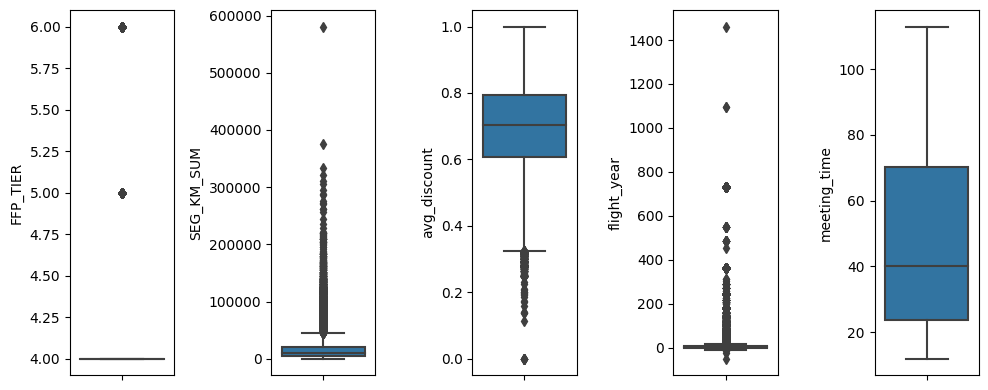

In [ ]:
nums=['FFP_TIER','SEG_KM_SUM','avg_discount','flight_year','meeting_time']
plt.figure(figsize = (12,4))
for i in range(0, len(nums)):
    plt.subplot(1, 6, i+1)
    sns.boxplot(y = dfd[nums[i]], orient='v')
    plt.tight_layout()

In [ ]:
print(f'Jumlah baris sebelum memfilter outlier: {len(dfd)}')

fil_outl = np.array([True] * len(dfd))
for col in ['SEG_KM_SUM','avg_discount','flight_year','meeting_time']:
    Q1 = dfd[col].quantile(0.25)
    Q3 = dfd[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    fil_outl = ((dfd[col] >= low_limit) & (dfd[col] <= high_limit)) & fil_outl

dfd = dfd[fil_outl].reset_index()


print('Jumlah baris setelah memfilter outlier', len(dfd))

Jumlah baris sebelum memfilter outlier: 55613
Jumlah baris setelah memfilter outlier 46378


In [ ]:
dfd=dfd.drop(['FFP_TIER'], axis=1)

## Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
feats = ['SEG_KM_SUM','avg_discount','flight_year','meeting_time']
X = dfd[feats].values
X_std = StandardScaler().fit_transform(X)
dfs = pd.DataFrame(data=X_std, columns=feats)

In [ ]:
dfs.head()

,SEG_KM_SUM,avg_discount,flight_year,meeting_time
0,3.153369,2.101638,2.965592,0.016523
1,3.147705,1.936503,0.327944,1.682880
2,2.915968,2.181300,2.316079,-0.616424
3,2.974855,2.040269,-0.311369,2.313393
4,3.037745,1.865456,1.288417,0.033564


# **Clustering : K-means Clustering**

In [ ]:
## Mencari N CLuster yang pas

from sklearn.cluster import KMeans
inertia = []

for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, random_state=0)
  kmeans.fit(X_std)
  nilai_inertia = kmeans.inertia_
  print('iterasi ke-',i, 'dengan nilai inertia : ',nilai_inertia)
  inertia.append(kmeans.inertia_)

iterasi ke- 1 dengan nilai inertia :  185511.99999999977
iterasi ke- 2 dengan nilai inertia :  137228.12485206418
iterasi ke- 3 dengan nilai inertia :  108830.58560815935
iterasi ke- 4 dengan nilai inertia :  90009.30290651151
iterasi ke- 5 dengan nilai inertia :  74517.54072814385
iterasi ke- 6 dengan nilai inertia :  66835.05591200656
iterasi ke- 7 dengan nilai inertia :  60487.89611403794
iterasi ke- 8 dengan nilai inertia :  56099.77329986832
iterasi ke- 9 dengan nilai inertia :  52282.84834665459
iterasi ke- 10 dengan nilai inertia :  49215.89941755281


<Axes: >

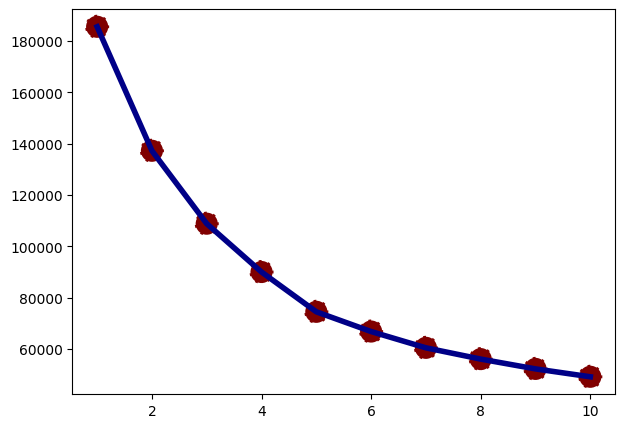

In [ ]:
plt.figure(figsize=(7, 5))

sns.lineplot(x=range(1, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(1, 11), y=inertia, s=300, color='#800000',  linestyle='--')

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X_std)

KMeans(n_clusters=4, random_state=0)

In [ ]:
dfs['cluster'] = kmeans.labels_
dfs.head()

,SEG_KM_SUM,avg_discount,flight_year,meeting_time,cluster
0,3.153369,2.101638,2.965592,0.016523,2
1,3.147705,1.936503,0.327944,1.682880,0
2,2.915968,2.181300,2.316079,-0.616424,2
3,2.974855,2.040269,-0.311369,2.313393,0
4,3.037745,1.865456,1.288417,0.033564,2


# **Data Visualization**

In [ ]:
dfd['cluster'] = kmeans.labels_

In [ ]:
dfd.groupby('cluster').agg(['mean','median'])

index             SEG_KM_SUM          avg_discount            \
                 mean   median          mean   median         mean    median   
cluster                                                                        
0        26743.161563  24030.0  16456.565431  14349.0     0.716430  0.713927   
1        43955.257581  45009.5   8037.494887   6677.5     0.544691  0.556864   
2        20125.696842  16606.0  21804.592316  21063.0     0.705269  0.705581   
3        38850.052219  39088.0   7305.084526   6076.0     0.812681  0.800058   

        flight_year            meeting_time             
               mean     median         mean     median  
cluster                                                 
0          2.186025   1.758389    82.660094  82.400049  
1          3.356458   2.764292    39.032584  35.581839  
2         10.728651  10.202304    29.131253  24.674018  
3          3.521537   3.037360    36.605677  34.366209

In [ ]:
## melakukan PCA untuk melihat visualisasi
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

pca.fit(dfs)
pcs = pca.transform(dfs)

In [ ]:
df_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
df_pca['cluster'] = dfs['cluster']
df_pca.head()

,PC 1,PC 2,cluster
0,-1.770153,3.342754,2
1,1.620639,2.193413,0
2,-1.901942,2.828556,2
3,2.189673,1.608075,0
4,-1.060268,2.327511,2


<Axes: xlabel='PC 1', ylabel='PC 2'>

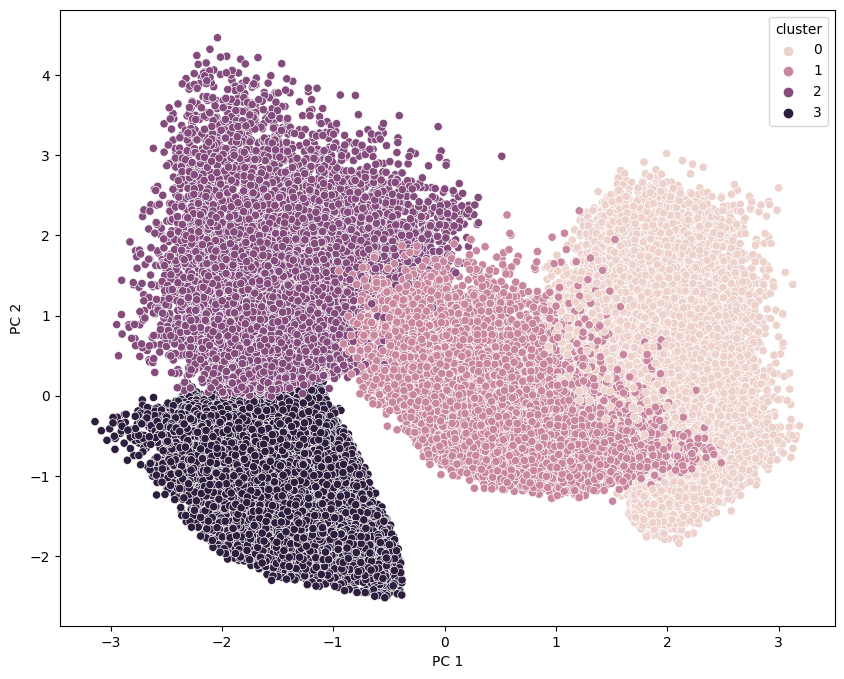

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
sns.scatterplot(data=df_pca, x='PC 1', y='PC 2', hue='cluster')

# **Data Insight**

### Berdasarkan hasil pengerjaan, dari keseluruhan pelanggan penerbangan diketahui pelanggan dapat terbagi menjadi 4 cluster. Pembagian cluster tersebut dipengaruhi oleh berbagai fitur, yaitu total jarak penerbangan yang sudah dilakukan, rata - rata discount yang didapatkan pelanggan, rata - rata penerbangan yang dilakukan per tahun, dan durasi lamanya pelanggan menjadi member.
### Adapun penjelasan dari tiap cluster pelanggan sebagai berikut:
### 1. Cluster 0 merupakan pelanggan paling lama dengan durasi rata - rata 82 bulan.Pelanggan tersebut memiliki frekuensi terbang per tahun yang cenderung rendah yaitu rata - rata 2 kali per tahun dengan jarak penerbangan yang sudah dilakukan rata - rata 16.456 km, atau dapat diperkirakan pelanggan sering melakukan penerbangan jarak jauh. Rata - rata discount yang didapat oleh pelanggan adalah 71,64%, hal ini juga dapat mempengaruhi frekuensi pelanggan melakukan penerbangan.
### 2. Cluster 1 merupakan pelanggan dengan durasi menjadi member sedang yaitu rata - rata 39 bulan. Pelanggan tersebut memiliki frekuensi terbang per tahun yang cenderung rendah yaitu rata - rata 3 kali per tahun dengan jarak penerbangan yang sudah dilakukan rata - rata 8.037 km, atau dapat diperkirakan pelanggan melakukan penerbangan dengan jarak yang cukup sedang. Rata - rata discount yang didapat oleh pelanggan adalah 54% paling kecil dibanding cluster lain, hal ini juga dapat mempengaruhi frekuensi pelanggan melakukan penerbangan.
### 3. Cluster 2 merupakan pelanggan baru dengan durasi rata - rata 29 bulan. Pelanggan tersebut memiliki frekuensi terbang per tahun yang tinggi yaitu rata - rata 10 kali per tahun dengan jarak penerbangan yang sudah dilakukan rata - rata 21.804 km, atau dapat diperkirakan pelanggan sering melakukan penerbangan jarak jauh. Rata - rata discount yang telah didapat oleh pelanggan adalah 70%, hal ini juga dapat mempengaruhi frekuensi pelanggan melakukan penerbangan.
### 4. Cluster 3 merupakan pelanggan dengan durasi menjadi member sedang yaitu rata - rata 36 bulan. Pelanggan tersebut memiliki frekuensi terbang per tahun yang cenderung rendah yaitu rata - rata 3 kali per tahun dengan jarak penerbangan yang sudah dilakukan rata - rata 7.305 km, atau dapat diperkirakan pelanggan melakukan penerbangan dengan jarak yang cukup sedang. Rata - rata discount yang telah didapat oleh pelanggan adalah 81% paling besar dibanding cluster lain, hal ini juga dapat mempengaruhi frekuensi pelanggan melakukan penerbangan.


### Rekomendasi : perusahaan dapat memberikan atau meningkatkan discount baik pada member baru maupun member lama agar member tetap berlangganan. discount yang diberikan pun disesuaikan dengan karakteristik pelanggan dalam menggunakan layanan, seperti adanya discount untuk pelanggan yang melakukan penerbangan jarak jauh dan discount untuk penerbangan jarak dekat.


